# 1.Data Preparation:

In [1]:
import pandas as pd
df = pd.read_excel("D:\excelr_assignments\Decision Tree\Decision Tree\heart_disease.xlsx",sheet_name='Heart_disease')
df.shape

(908, 13)

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# 2.Exploratory Data Analysis (EDA):

In [3]:
# Check for missing values

df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [4]:
# Check for outliers

df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


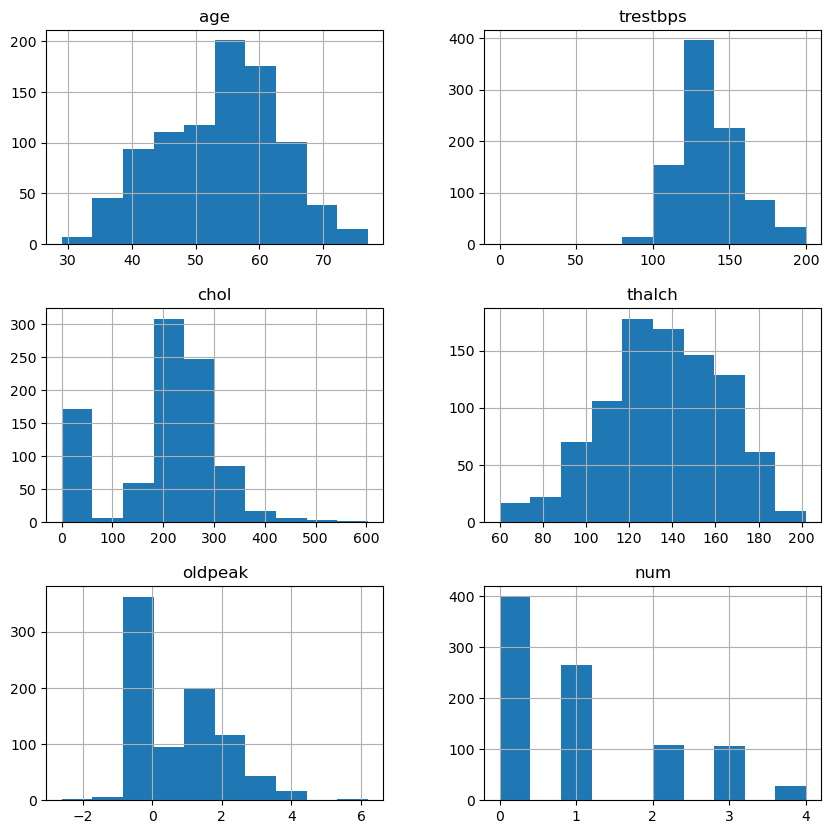

In [5]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10), bins=10)
plt.show()

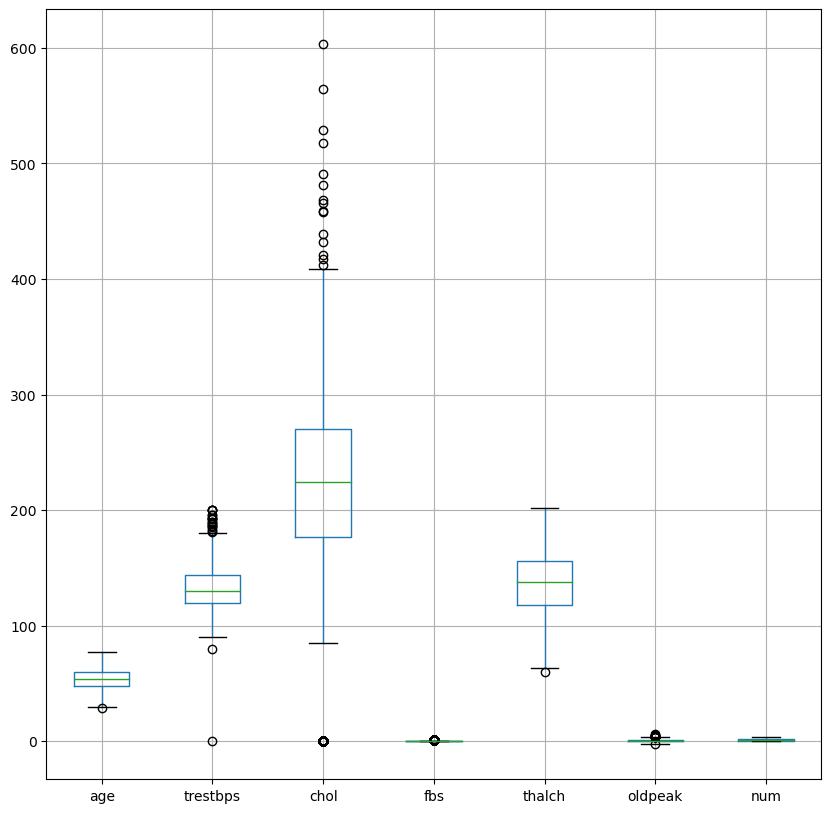

In [6]:
#box plot

df.boxplot(figsize=(10, 10))
plt.show()

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Correlation matrix for numerical variables

num_corr = df[num_cols].corr()

# Display the correlation matrix

print("Correlation matrix for numerical variables:")
display(num_corr)

Correlation matrix for numerical variables:


,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.029898,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,-0.323058,0.437577,1.000000


# 3.Feature Engineering:

In [8]:
# Encoding categorical variables

df = pd.get_dummies(df, drop_first=True)

# Scaling numerical features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Handling missing values

df.fillna(df.mean(), inplace=True)

In [9]:
# Check for missing values

df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

# 4.Decision Tree Classification:

In [10]:
import pandas as pd
df = pd.get_dummies(df, drop_first=True)
df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the dataset into training and testing 

df['num'] = (df['num'] > 0).astype(int)
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Decision Tree Classification model

model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Create an imputer object

imputer = SimpleImputer(strategy='mean')
# Train the model on the training set

model.fit(X_train, y_train)

# Evaluate the model on the testing set

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

In [12]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7252747252747253
Precision: 0.7252747252747253
Recall: 0.7252747252747253
F1 Score: 0.7252747252747253
ROC-AUC: 0.6309813463098135


# 5.Hyperparameter Tuning:

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search

grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy', 'gini']
}

# Create a DecisionTreeClassifier instance

dt_clf = DecisionTreeClassifier()

# Instantiate the GridSearchCV object

grid_search = GridSearchCV(estimator=dt_clf, param_grid=grid, cv=5)

# Fit the grid search object to the training data

grid_search.fit(X_train, y_train)

# Get the best hyperparameters

best_params = grid_search.best_params_

# Print the best hyperparameters

print('Best Hyperparameters:')
print(best_params)

# Get the best model

best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.7197802197802198
Precision: 0.6968871748283514
Recall: 0.7197802197802198
F1 Score: 0.7056789978841945
ROC-AUC: 0.5825628548256285


# 6.Model Evaluation and Analysis:

[[117  20]
 [ 31  14]]


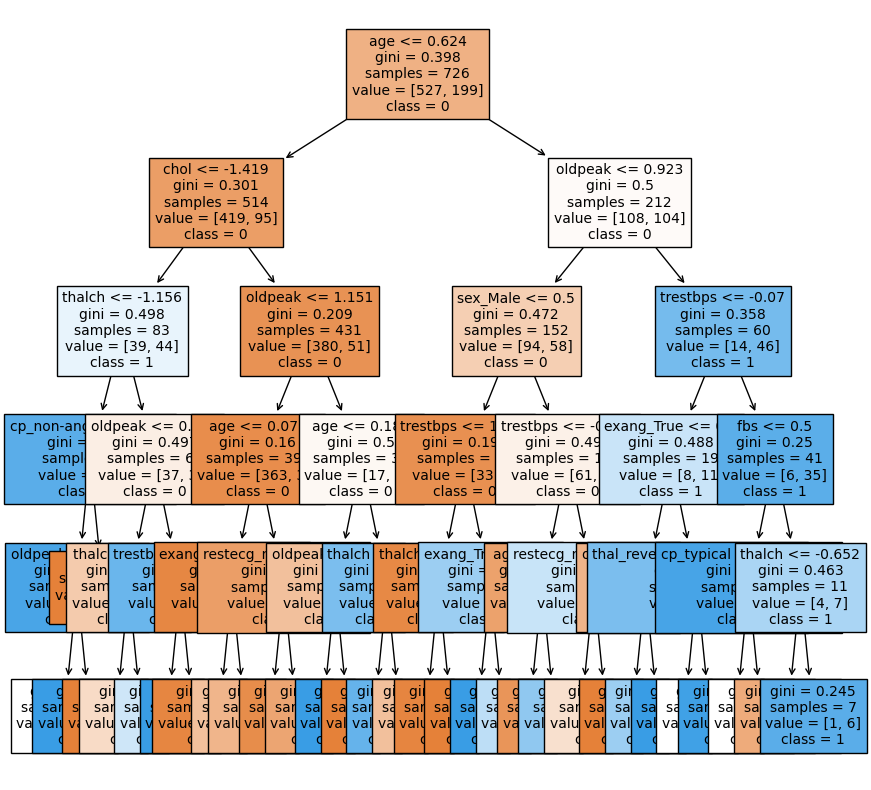

age: 0.26555928976317933
trestbps: 0.08947760650177713
chol: 0.1748235856741759
fbs: 0.01051497878445986
thalch: 0.06705735495206586
oldpeak: 0.23830877958708394
sex_Male: 0.054178074311855624
cp_atypical angina: 0.0
cp_non-anginal: 0.011720473306302583
cp_typical angina: 0.0059606203365617574
restecg_normal: 0.03981200493697792
restecg_st-t abnormality: 0.0
exang_True: 0.02399284268142653
exang_FALSE: 0.007484357175867664
exang_TURE: 0.0
slope_flat: 0.0
slope_upsloping: 0.0
thal_normal: 0.0
thal_reversable defect: 0.01111003198826598


In [14]:
import matplotlib.pyplot as plt

# Print the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize the decision tree

from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['0', '1'], fontsize=10, filled=True)
plt.show()

# Feature importance

importance = best_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")


In [15]:
# Evaluate the model performance using the obtained metrics

# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision

precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Recall

recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# F1 Score

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

# ROC-AUC Score

roc_auc = roc_auc_score(y_test, y_pred)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7197802197802198
Precision: 0.6968871748283514
Recall: 0.7197802197802198
F1 Score: 0.7056789978841945
ROC-AUC: 0.5825628548256285
